In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("data_cleaned_2021.csv")
df = df.drop("index",axis=1) 

In [3]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M


In [78]:
print("Number of rows in the dataset:",df.shape[0])


Number of rows in the dataset: 742


In [5]:
df.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

In [6]:
df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# I notice that there are -1 in rating, and it has no meaning, so I handle the -1 first
df["Rating"] = df["Rating"].apply(lambda x: np.nan if x==-1 else x)

# Fill missing values with the mean of the distribution.
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

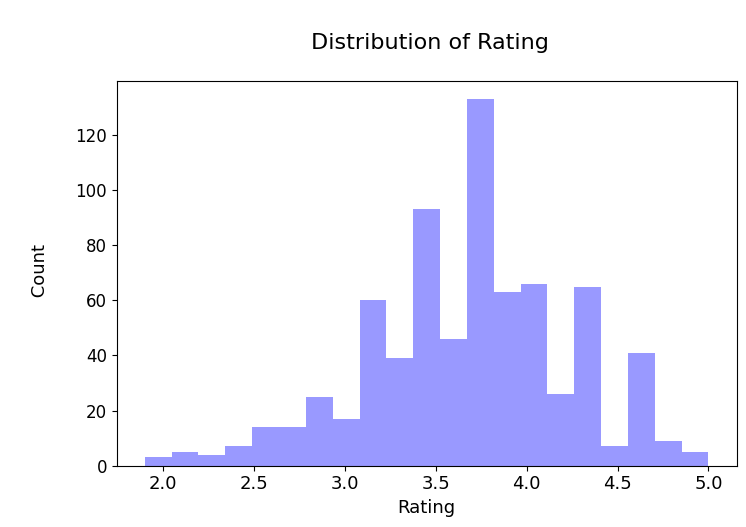

In [79]:
# I want to see the distribution of their ratings first

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Count\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df["Rating"],kde=False,color="blue")
plt.savefig("rating.jpg")
plt.show()

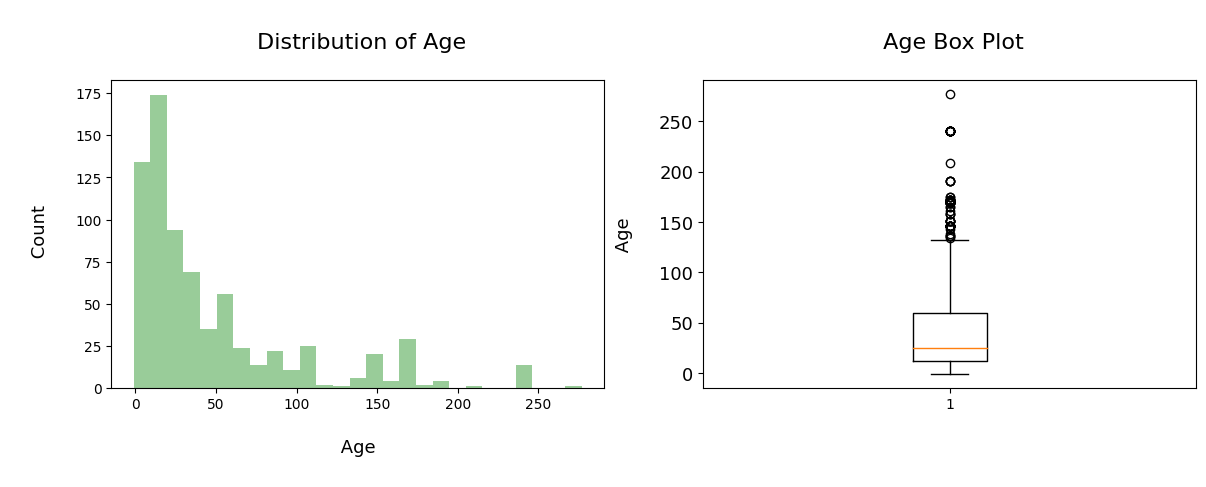

In [80]:
# Then I want to see the distribution of their age since we care much about the layoff

plt.figure(figsize=(14, 4)) 

ax=plt.subplot(1,2,1)
sns.distplot(df.Age,kde=False,color="green")
plt.title('\n Distribution of Age\n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Count\n', fontsize=13, color='black')

# We can notice that there are a lot of impossible statistics, people can't live to be over 200 years old
# so we can use the boxplot to find the outliers

ax=plt.subplot(1,2,2)
plt.boxplot(df.Age)
plt.title('\n Age Box Plot\n', size=16, color='black')
plt.ylabel('\n Age \n', fontsize=13, color='black')
plt.yticks(fontsize=13)

plt.savefig("age.JPG")
plt.show()


In [131]:
# And then I wanted to find out which states had the highest average salary, 
# so I sorted them by the highest average salary

g = df.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)[0:10]
print(g)
g = g.reset_index().rename(columns={"Avg Salary(K)":"Average Salary"})

Job Location
CA    123.513158
IL    116.662500
DC    110.181818
MA    107.495146
NJ    104.558824
MI    100.250000
RI    100.000000
NY     98.652778
NC     98.452381
MD     97.357143
Name: Avg Salary(K), dtype: float64


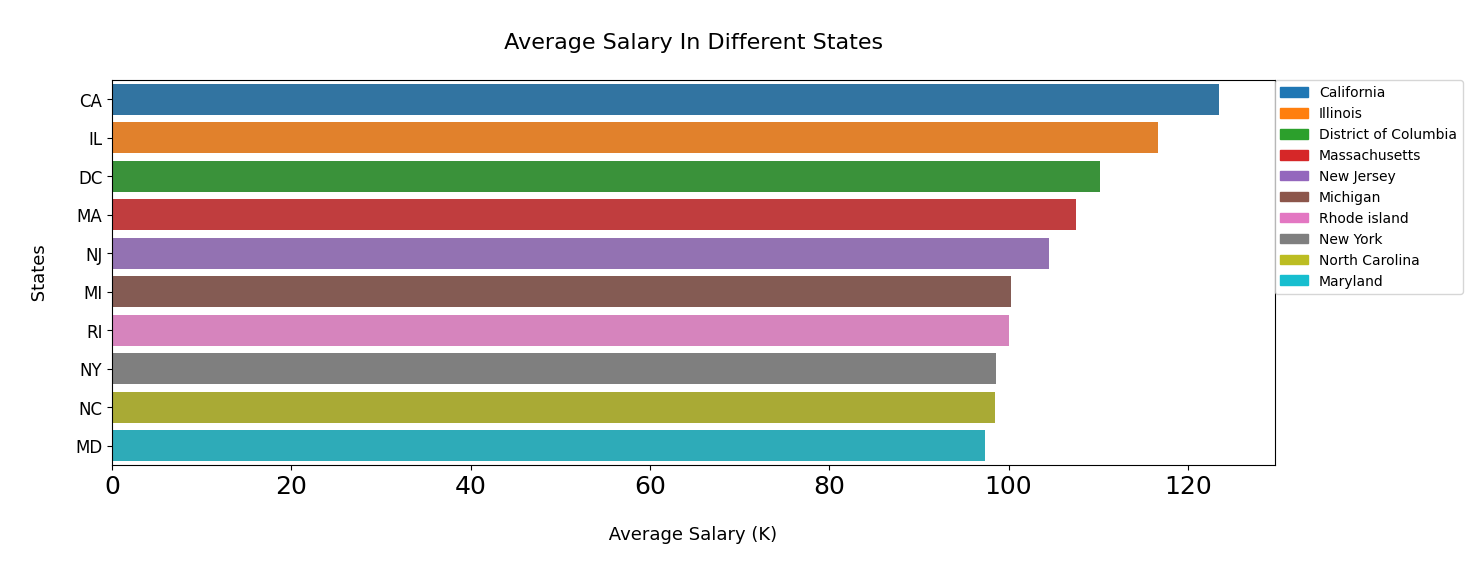

In [143]:
# Plotting the average salary per annum for different states.
import matplotlib

lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]
plt.figure(figsize=(15,5))
sns.barplot(y="Job Location", x = "Average Salary",data=g)

#Beautifying the plot

plt.title('\n Average Salary In Different States \n', size=16, color='black')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.savefig("ave_salary.JPG")
plt.show()

In [27]:
# First we see how many industries we have in the dataset.

df["Industry"].nunique()

60

In [117]:
# And I want to find out the top 10 industrie that with most number of data science related jobs
labels= [x for x in df["Industry"].value_counts().sort_values(ascending=False)[0:10].index] # piechart for only top 5 industry
print(labels)

['Biotech & Pharmaceuticals', 'Insurance Carriers', 'Computer Hardware & Software', 'IT Services', 'Health Care Services & Hospitals', 'Enterprise Software & Network Solutions', 'Internet', 'Consulting', 'Advertising & Marketing', 'Aerospace & Defense']


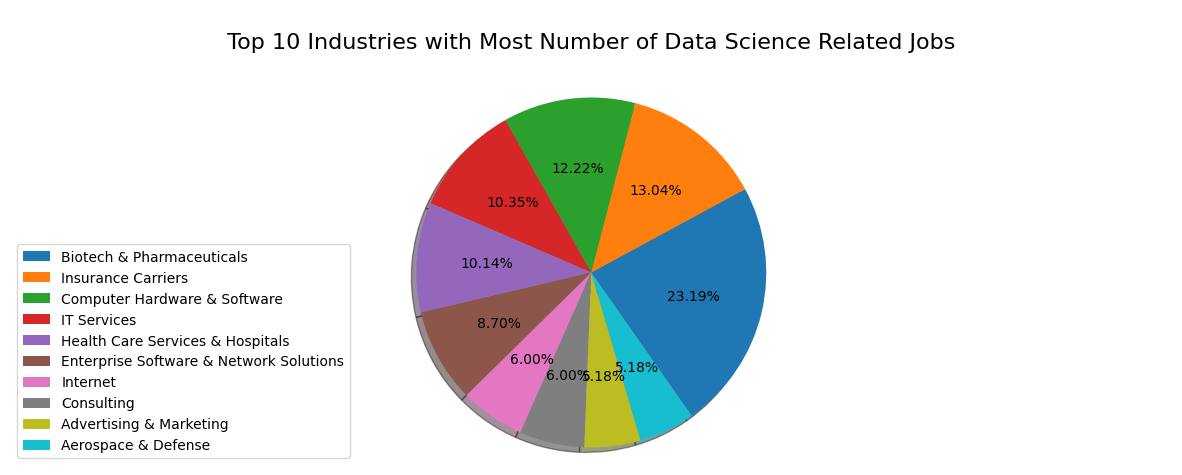

In [120]:
plt.figure(figsize=(15,5))
patches,ax,text= plt.pie(df["Industry"].value_counts().sort_values(ascending=False)[0:10],autopct='%1.2f%%',shadow=True,startangle=305)
plt.title('\n Top 10 Industries with Most Number of Data Science Related Jobs \n', size=16, color='black')
plt.legend(patches, labels, loc=3)
plt.axis('equal')
plt.savefig("industry.JPG")
plt.show()

<Figure size 20000x10000 with 0 Axes>

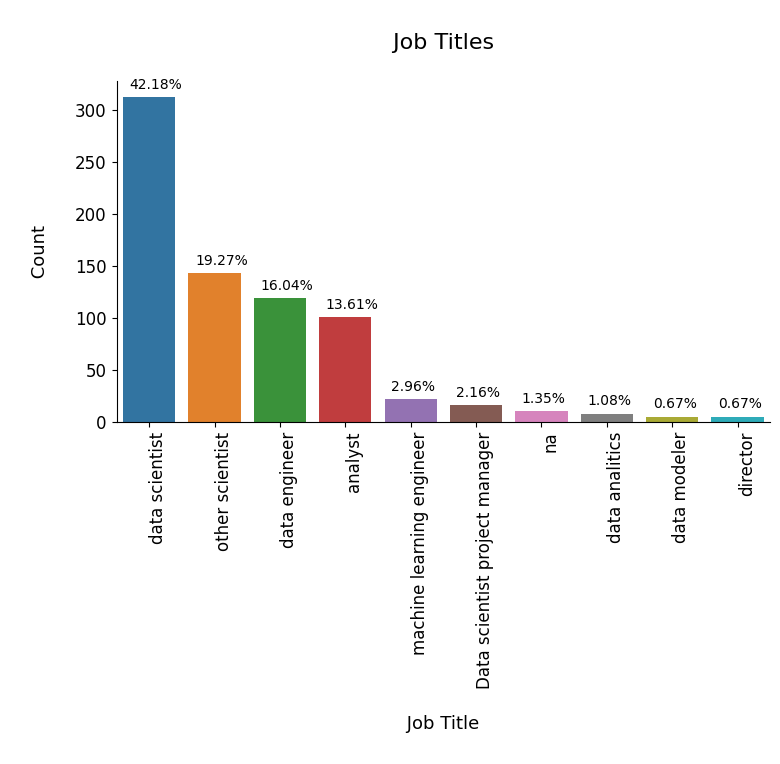

In [163]:
# Last I want to see the distribution of job titles so that we can know the demond in market

plt.figure(figsize=(200,100))


catp = sns.catplot(x="job_title_sim",data=df,order=df.job_title_sim.value_counts().index,kind="count")
catp.fig.set_size_inches(8,4)

# put data on the bar plot.

spots = df.job_title_sim.value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1, p.get_height()+8, '{:.2f}%'.format((p.get_height()/742)*100))


    
plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.savefig("job_title.JPG",bbox_inches="tight")
plt.show()
